### **ANÁLISIS IMDB TOP 250 MOVIES**

- Importamos las librerias

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from IPython.display import display_html
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from wordcloud import STOPWORDS as stopwords_wc
from wordcloud import WordCloud, ImageColorGenerator

In [28]:
df = pd.read_csv("IMDB_Top250Movies.csv")

In [29]:
# Analizamos los primeros registros
df.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [30]:
# Verificamos el contenido y tipos de datos del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [31]:
#Estadísticas del DataFrame
df.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [32]:
# Dividir la columna de género en columnas separadas
genres_df = df['genre'].str.split(',', expand=True)

# Renombrar las columnas
num_cols = len(genres_df.columns)
genres_df.columns = [f'genre_{i}' for i in range(1, num_cols + 1)]

# Combinar las nuevas columnas con el DataFrame original
df = pd.concat([df, genres_df], axis=1)

In [33]:
df

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,genre_1,genre_2,genre_3
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",Drama,None,None
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",Crime,Drama,None
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",Action,Crime,Drama
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",Crime,Drama,None
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,Crime,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,The Help,2011,8.1,Drama,PG-13,2h 26m,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett",Drama,None,None
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2h 22m,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev",Adventure,Biography,Drama
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1h 30m,Wish granted! (DVD re-release),Not Available,Not Available,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott",Animation,Adventure,Comedy
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3h 11m,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley,Biography,Drama,History


In [34]:
#Crear copia del archivo con las columnas genero modificadas.
df2 = df.copy()

## **ANÁLISIS EXPLORATORIO DE DATOS** (EDA)

- Iniciamos haciendo un top del rating según el género de las películas.

In [35]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce') #Asegurarse de que la columna 'rating' esté en formato numérico

top_rates = df.groupby('genre')['rating'].mean().sort_values(ascending=False).head(10) # Agrupar el DataFrame por el campo 'genre' y calcula el promedio de las calificaciones para cada grupo
top_rates_df = pd.DataFrame({'Género': top_rates.index, 'rating': top_rates.values}).round(2) #Crear un nuevo DataFrame con los resultados
top_rates_df

,Género,rating
0,"Adventure,Western",8.8
1,"Action,Adventure,Drama",8.7
2,"Adventure,Drama,Sci-Fi",8.6
3,"Drama,Family,Fantasy",8.6
4,"Crime,Drama,Fantasy",8.6
5,"Action,Drama,Mystery",8.5
6,"Animation,Adventure,Drama",8.5
7,"Drama,Music",8.5
8,"Drama,Mystery,Sci-Fi",8.5
9,"Drama,Mystery,War",8.5


- Gráfico de barras para representar las 10 películas con las calificaciones más altas, clasificadas por género.

In [36]:
top_rates = df.nlargest(10, 'rating')

fig = go.Figure(data=[go.Bar(x=top_rates['genre'], y=top_rates['rating'], marker={'color': '#00FA9A'})])
fig.update_layout(title='Top 10 Películas por Género')
fig.show()

- Gráfico de barras muestra las 10 películas con las calificaciones más altas, mostrando los nombres de las películas en el eje x y las calificaciones en el eje y.

In [37]:
top_movies = df.nlargest(10, 'rating')

fig = go.Figure(data=[go.Bar(x=top_movies['name'], y=top_movies['rating'], marker={'color': '#3CB371'})])
fig.update_layout(title='Top 10 Películas por Calificación (Rating)')
fig.show()

- Este gráfico de barras muestra los 10 directores principales según las calificaciones más altas de sus películas. Cada barra representa un director y su respectiva calificación promedio, permitiendo identificar fácilmente los directores con las mejores calificaciones en la list

In [38]:
top_movies_d = df.nlargest(10, 'rating')

fig = go.Figure(data=[go.Bar(x=top_movies_d['directors'], y=top_movies_d['rating'], marker={'color': '#2E8B57'})])
fig.update_layout(title='Top 10 Películas por Directores')
fig.show()

- Histograma que representa la distribución de los ratings en el conjunto de datos. Cada barra en el histograma representa un rango de valores (intervalo), y la altura de la barra indica la frecuencia (número de ocurrencias) de los ratings dentro de ese rango. 

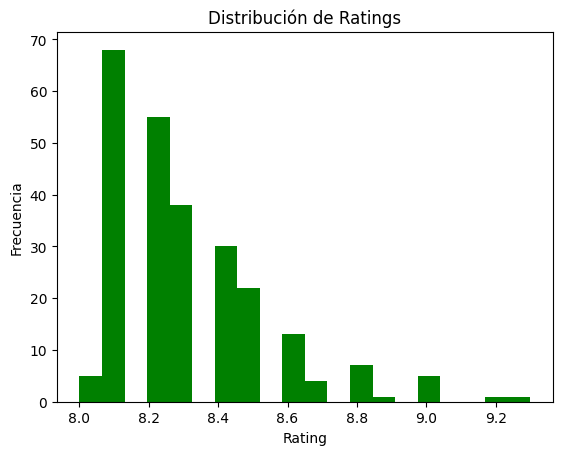

In [39]:
plt.hist(df['rating'], bins=20, color='green')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')
plt.show()

- Este sunburst representa visualmente cómo se distribuyen las calificaciones de las películas en función de su género y año de lanzamiento, proporcionando una visión interactiva y jerárquica de la información.

In [40]:
agrupar_df = df.groupby(['genre', 'year', 'rating']).size().reset_index(name='count')
fig = px.sunburst(agrupar_df, path=['genre', 'year', 'rating'], values='count')
fig.update_layout(title='Calificaciones de Películas por Género y Año', height = 1200, width = 1200)
fig.show()

- Gráfico de linea que visualiza cómo la calificación promedio de las películas ha cambiado a lo largo de los años, proporcionando una visión general de las tendencias en las calificaciones a lo largo del tiempo.

In [41]:
agrupar_df = df.groupby('year')['rating'].mean().reset_index()

fig = px.line(agrupar_df, x='year', y='rating', title='Calificación Promedio a lo Largo del Tiempo', color_discrete_sequence=['#00FF00'])
fig.update_layout(xaxis_title='Year', yaxis_title='Calificación Promedio')
fig.show()

- Pie Chart para analizar como distribuyen las calificaciones promedio de las películas en diferentes certificados. Cada sector del pastel representa un certificado, y el tamaño del sector está proporcionalmente relacionado con la calificación promedio de ese certificado.

In [42]:
avg_ratings = df.groupby('certificate')['rating'].mean().reset_index()

fig = px.pie(avg_ratings, names='certificate', values='rating', title='Calificaciones promedio por certificado')
fig.show()

- Gráfico de tabla que proporciona una visualización clara de las 10 películas más antiguas, mostrando su nombre y año de lanzamiento.

In [43]:
peliculas_antiguas= df.sort_values(by='year')[0:10]

fig = go.Figure(data=[go.Table(header=dict(values=['Nombre de la Película', 'Año de Lanzamiento'],fill_color='lightgreen'),
                 cells=dict(values=[peliculas_antiguas['name'],peliculas_antiguas['year']]))
                     ])
fig.update_layout(title_text='Películas Más Antiguas')
fig.show()

- Gráfico de tabla que proporciona una visualización clara de las 10 películas más recientes, mostrando su nombre y año de lanzamiento.

In [44]:
peliculas_recientes=df.sort_values(by='year', ascending=False)[0:10]
fig = go.Figure(data=[go.Table(header=dict(values=['Nombre de la Película', 'Año de Lazamiento'], fill_color='lightgreen'),
                 cells=dict(values=[peliculas_recientes['name'],peliculas_recientes['year']]))
                     ])
fig.update_layout(title_text='Películas Más Recientes')
fig.show()

- Nube de palabras para visualizar de manera efectiva los géneros de películas más frecuentes en el conjunto de datos.

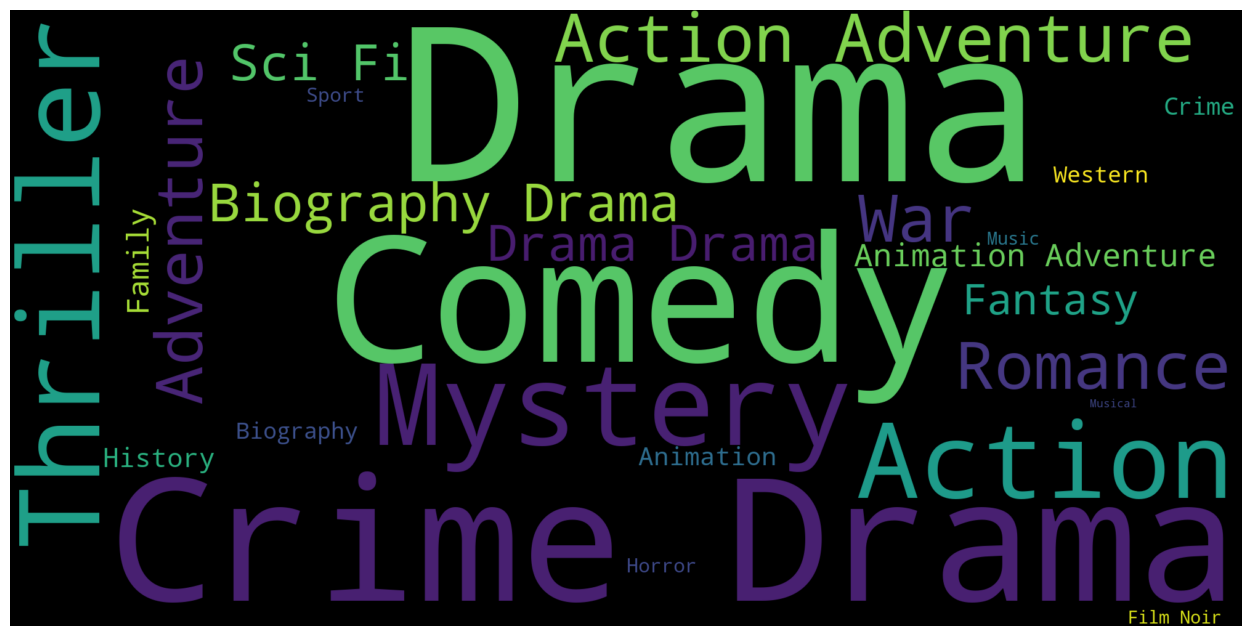

In [45]:
# Concatenar todos los géneros en una cadena
all_genres = " ".join(token for token in df["genre"])

# Crear la nube de palabras
wordcloud = WordCloud(stopwords=stopwords_wc,
                      max_words=1500,
                      max_font_size=350, random_state=42,
                      width=2000, height=1000,
                      colormap="viridis",
                      contour_color='steelblue')
wordcloud.generate(all_genres)


plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Verificamos la cantidad de películas para cada certificado en el DataFrame y añadimos un diccionarios que nos indica a qué se refiere cada certificado.

In [46]:
certificate_counts = df['certificate'].value_counts()
certificate_counts

certificate
R                97
PG               37
PG-13            35
Not Rated        24
G                19
Passed           16
Approved         14
18+               1
Not Available     1
TV-PG             1
Unrated           1
X                 1
13+               1
TV-MA             1
GP                1
Name: count, dtype: int64

### **Conclusión**

- La exploración de 'IMDB Top 250 Movies' destaca la diversidad y atemporalidad del cine. La presencia de diversos géneros, directores y años refleja la riqueza de la industria. Desde clásicos hasta películas contemporáneas, la lista demuestra que la calidad cinematográfica trasciende las décadas, ofreciendo una mirada fascinante a través del tiempo.